In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense,Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge

In [8]:
train_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_x_xgboost.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\test_x_xgboost.csv')

In [9]:
train_x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,score,an_income,pre_total_duration
0,31,7,1,1,0,12294,1,0,0,21,8,101,3,498,0,1,1.0,135234,0
1,29,2,2,2,0,43027,0,0,0,22,1,158,2,702,0,3,2.0,387243,0
2,35,4,1,2,0,12252,1,0,0,11,8,351,1,826,0,0,2.0,183780,0
3,31,9,1,1,0,99121,1,1,2,16,7,658,2,120,0,0,0.0,1090331,0
4,48,10,1,0,0,42005,1,0,1,3,0,177,1,273,0,3,3.0,1176140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,1,1,1,0,26661,1,0,0,27,7,345,4,425,0,3,1.0,453237,0
27096,35,7,1,1,0,42150,1,0,0,27,7,121,1,719,0,3,1.0,632250,0
27097,35,7,1,3,0,34531,0,0,0,28,5,177,2,121,0,3,2.0,517965,0
27098,30,0,2,1,0,99621,1,0,0,27,7,121,1,100,0,3,2.0,996210,0


In [10]:
cust_array = np.array([train_x['age'].tolist(),
                     train_x['job'].tolist(),
                     train_x['marital'].tolist(),
                     train_x['education'].tolist(),
                     train_x['default'].tolist(),
                     train_x['balance'].tolist(),
                     train_x['housing'].tolist(),
                     train_x['loan'].tolist(),
                     train_x['contact'].tolist(),
                     train_x['day'].tolist(),
                     train_x['month'].tolist(),
                     train_x['duration'].tolist(),
                     train_x['campaign'].tolist(),
                     train_x['pdays'].tolist(),
                     train_x['previous'].tolist(),
                     train_x['poutcome'].tolist(),
                     train_x['score'].tolist(),
                     train_x['an_income'].tolist(),
                     train_x['pre_total_duration'].tolist()])

In [11]:
cust_array.shape

(19, 27100)

In [12]:
cust_array = cust_array.T

In [13]:
pred = KMeans(n_clusters=2).fit_predict(cust_array)

In [18]:
pred = pd.Series(pred)
pred.value_counts()

0    21376
1     5724
dtype: int64

In [21]:
train_y['y'].value_counts()

0    24988
1     2112
Name: y, dtype: int64

In [16]:
score = log_loss(train_y,pred)
print(score)

8.506121992222043


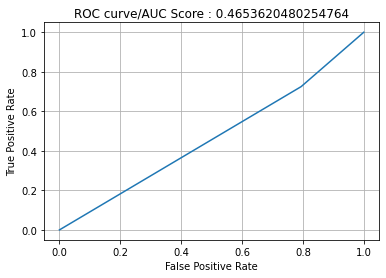

In [18]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(train_y,pred)
auc_score = roc_auc_score(train_y,pred)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

In [71]:
train = pd.read_csv('train_x_2.csv')

In [72]:
train

,pred_1a,pred_1b,pred_1c,pred_1d,pred_1e
0,0.004977,0.004787,0.00,0.010711,0.010281
1,0.150177,0.124959,0.27,0.117578,0.143222
2,0.007845,0.003139,0.00,0.011606,0.004239
3,0.007219,0.000893,0.00,0.010152,0.001166
4,0.056702,0.441725,0.33,0.153166,0.201263
...,...,...,...,...,...
27095,0.003275,0.023832,0.00,0.011997,0.017037
27096,0.043376,0.042265,0.01,0.023338,0.020152
27097,0.090967,0.230587,0.09,0.087557,0.160922
27098,0.067961,0.057549,0.02,0.070824,0.066209


In [82]:
scaler = StandardScaler()
scaler.fit(train)
tr_x = scaler.transform(train)
cust_array = []
for i in range (train.shape[1]):
    list_s = train.iloc[:,i].tolist()
    cust_array.append(list_s)
    
cust_array = np.array(cust_array)
cust_array = cust_array.T
model = KMeans(n_clusters = 2)
pred = model.fit_predict(cust_array)

In [86]:
score = log_loss(train_y,pred)
print(score)

2.5693966705611935


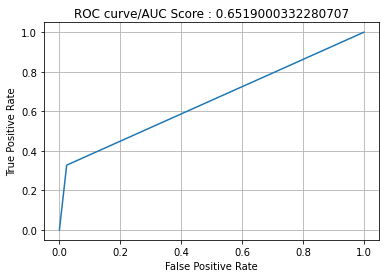

In [88]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(train_y,pred)
auc_score = roc_auc_score(train_y,pred)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

list